In [1]:
# Import all libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import threading
import psutil
import os
import time
import numpy as np
import gc
import seaborn as sns
import pprint
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the data
train_images = np.load(r'D:\Another\data\train_images.npy')
train_labels = np.load(r'D:\Another\data\train_labels.npy')
val_images = np.load(r'D:\Another\data\val_images.npy')
val_labels = np.load(r'D:\Another\data\val_labels.npy')

## 1-Preprocessing

In [3]:
# Resize the image to 128x128
train_images = tf.image.resize(train_images, (128, 128)).numpy()
val_images = tf.image.resize(val_images, (128, 128)).numpy()
# Normalize the image
val_images = val_images / 255.0
train_images = train_images / 255.0

In [4]:
#One-hot encode the validation labels
train_labels = to_categorical(train_labels, num_classes=5)
val_labels = to_categorical(val_labels, num_classes=5)

## 2-Training

In [5]:
# Define the model 
model = Sequential([
    SeparableConv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    SeparableConv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    SeparableConv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),
    Dense(5, activation='softmax')
])

d:\Another\envi\Lib\site-packages\keras\src\layers\convolutional\base_separable_conv.py:104: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Model successfully defined and compiled")

Model successfully defined and compiled


In [7]:
# Train the model with validation data
history = model.fit(
    train_images, train_labels,
    epochs=20,  
    batch_size=8,
    validation_data=(val_images, val_labels)
)

Epoch 1/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 57s 45ms/step - accuracy: 0.4756 - loss: 1.2450 - val_accuracy: 0.9175 - val_loss: 0.2652
Epoch 2/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 45s 37ms/step - accuracy: 0.9451 - loss: 0.1897 - val_accuracy: 0.9651 - val_loss: 0.1022
Epoch 3/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 46s 38ms/step - accuracy: 0.9729 - loss: 0.0931 - val_accuracy: 0.9759 - val_loss: 0.0676
Epoch 4/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9771 - loss: 0.0722 - val_accuracy: 0.9864 - val_loss: 0.0433
Epoch 5/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9852 - loss: 0.0519 - val_accuracy: 0.9849 - val_loss: 0.0422
Epoch 6/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.9856 - loss: 0.0400 - val_accuracy: 0.9855 - val_loss: 0.0424
Epoch 7/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 44s 37ms/step - accuracy: 0.9863 - loss: 0.0408 - val_accuracy: 0.9784 - val_loss: 0.0577
Epoch 8/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 44s 36ms/step - accuracy: 0.9898 -

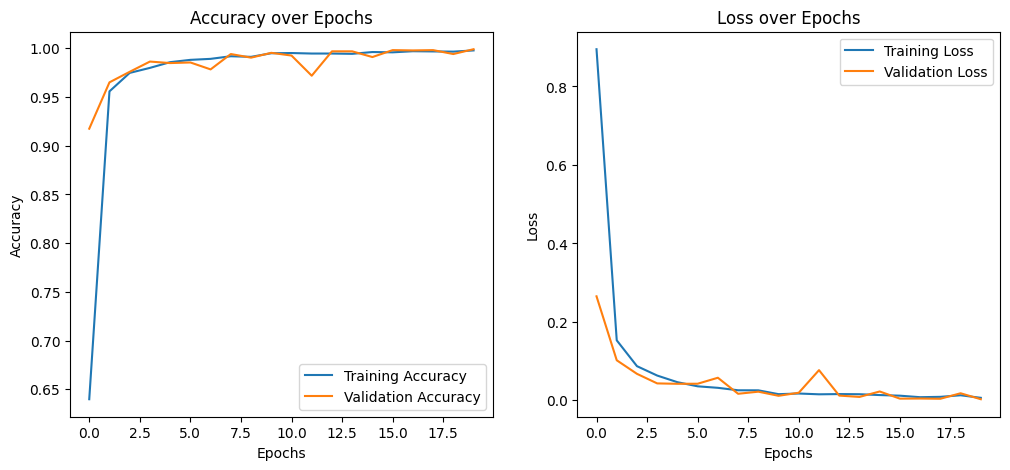

In [8]:
# Get the history of the training
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# The curve accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# The curve Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [9]:
# The final Precision
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f"Précision finale sur l'ensemble d'entraînement : {final_train_accuracy:.4f}")
print(f"Précision finale sur l'ensemble de validation : {final_val_accuracy:.4f}")

Précision finale sur l'ensemble d'entraînement : 0.9978
Précision finale sur l'ensemble de validation : 0.9991


In [10]:
# Save the model
model.save('Model_Cnn.h5')
print("Modèle sauvegardé au format HDF5.")

Modèle sauvegardé au format HDF5.


In [7]:
# Charge the model
loaded_model = tf.keras.models.load_model('Model_Cnn.h5')

In [8]:
# Make the prediction
val_predictions = loaded_model.predict(val_images)
val_predictions = np.argmax(val_predictions, axis=1)
val_labels = np.argmax(val_labels, axis=1)

102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


In [9]:
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       727
           1       1.00      1.00      1.00       222
           2       1.00      1.00      1.00       421
           3       1.00      1.00      1.00       721
           4       1.00      1.00      1.00      1146

    accuracy                           1.00      3237
   macro avg       1.00      1.00      1.00      3237
weighted avg       1.00      1.00      1.00      3237



## 3-Evaluation Pipeline

In [2]:
# Charge the data Test
test_images = np.load('data/test_images1.npy')  # Charger les images de test
test_labels = np.load('data/test_labels.npy')   # Charger les labels de test

In [3]:
# #One-hot encode the validation labels
test_labels = to_categorical(test_labels, num_classes=5)

In [4]:
# Define the fuction preprocessing_fn_Cnn
def preprocessing_fn_CNN(test_images):
    test_images = tf.image.resize(test_images, (128, 128)).numpy()
    test_images = test_images / 255.0
    return test_images

In [5]:
# Function to monitor memory and CPU usage
def monitor_resources(mem_usage, cpu_usage, stop_event):
    process = psutil.Process(os.getpid())
    while not stop_event.is_set():
        mem = process.memory_info().rss / (1024 * 1024)  # Memory in MB
        cpu = process.cpu_percent(interval=None)  # CPU usage percentage
        mem_usage.append(mem)
        cpu_usage.append(cpu)
        time.sleep(0.1)  # Sampling interval

# Function to preprocess test data
def preprocess_data(preprocessing_fn, X_test_raw):
    return preprocessing_fn(X_test_raw)

# Function to make predictions
def make_predictions(model, X_test_processed):
    return model.predict(X_test_processed)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    """
    Plot a confusion matrix with labels.

    Parameters:
    - cm: Confusion matrix.
    - class_names: List of class names.
    """
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


def print_evaluation_results(metrics, class_names):
    """
    Print evaluation metrics and display the confusion matrix.

    Parameters:
    - metrics: Dictionary containing evaluation metrics.
    - class_names: List of class names for the confusion matrix.
    """
    # Print general metrics in a formatted style
    
    print("\n### Evaluation Metrics ###\n")
    print(f"Evaluation Time:       {metrics['evaluation_time']:.2f} seconds (The time it took for the pipeline to preprocess data and make predictions.)")
    print(f"Peak Memory Usage:     {metrics['peak_memory_usage']:.2f} MB (The maximum memory used during evaluation.)")
    print(f"Average CPU Usage:     {metrics['average_cpu_usage']:.2f} % (The % shows how much of one CPU core was used during the evaluation.)")
    print(f"Algorithm code size:         {metrics['algorithm_code_size']:.2f} MB (The size of the trained model and preprocessing function.)")
    print(f"Accuracy:              {metrics['accuracy']:.3f} (The percentage of correctly classified samples.)")
    print(f"F1 Score:              {metrics['f1_score']:.3f} (A balance of precision and recall, useful for imbalanced datasets.)")

    # Plot the confusion matrix
    print("\n### Confusion Matrix ###\n")
    plot_confusion_matrix(metrics['confusion_matrix'], class_names)

    
# Function to compute evaluation metrics
def compute_metrics(y_test, y_pred, class_names):
    metrics = {}
    if len(y_pred.shape) != 1:
        y_pred = (y_pred > 0.5).astype(int)
        y_pred = np.argmax(y_pred, axis=1)
        y_test = np.argmax(y_test, axis=1)

        # print(y_pred)
        # print(y_test)
        

    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['f1_score'] = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    metrics['confusion_matrix'] = cm

    return metrics

# Function to calculate algorithm_code_size
def calculate_algorithmCode_size(model, preprocessing_fn):
    model_size = len(pickle.dumps(model))
    preprocessing_size = len(pickle.dumps(preprocessing_fn))
    return (model_size + preprocessing_size) / (1024 * 1024)  # In MB

# Main function to evaluate the pipeline
def evaluate_pipeline(model, X_test_raw, y_test, preprocessing_fn):
    """
    Evaluate a machine learning pipeline.

    Parameters:
    - model: Trained machine learning model.
    - X_test_raw: Raw test data.
    - y_test: True labels for test data.
    - preprocessing_fn: Function to preprocess raw data.

    Returns:
    - metrics: Dictionary containing evaluation metrics.
    """
    class_names = ["Blurry", "Corrupt", "Missing_Data", "Noisy", "Priority"]
    
    # Set CPU affinity to core 4 (the fourth core)
    p = psutil.Process(os.getpid())
    p.cpu_affinity([4])

    # Lists to store memory and CPU usage data
    mem_usage = []
    cpu_usage = []

    # Event to stop monitoring
    stop_monitoring = threading.Event()

    # Start resource monitoring in a separate thread
    monitor_thread = threading.Thread(target=monitor_resources, args=(mem_usage, cpu_usage, stop_monitoring))
    monitor_thread.start()

    # Start timing
    start_time = time.time()

    # Preprocess the test data
    X_test_processed = preprocess_data(preprocessing_fn, X_test_raw)

    # Make predictions
    y_pred = make_predictions(model, X_test_processed)

    # End timing
    end_time = time.time()

    # Stop monitoring
    stop_monitoring.set()
    monitor_thread.join()

    # Collect metrics
    metrics = {}
    metrics['evaluation_time'] = end_time - start_time  # In seconds
    metrics['peak_memory_usage'] = max(mem_usage)  # In MB
    metrics['average_cpu_usage'] = np.mean(cpu_usage)  # In percentage
    metrics.update(compute_metrics(y_test, y_pred, class_names))  # Add accuracy, F1 score, etc.
    metrics['algorithm_code_size'] = calculate_algorithmCode_size(model, preprocessing_fn)  # In MB

    print_evaluation_results(metrics, class_names)
    
    # Clean up to free memory
    del X_test_processed, y_pred
    gc.collect()

    return metrics

In [6]:
# Charge the model
loaded_model = tf.keras.models.load_model('Model_Cnn.h5')

2025-04-10 10:06:14.709917: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step

### Evaluation Metrics ###

Evaluation Time:       11.01 seconds (The time it took for the pipeline to preprocess data and make predictions.)
Peak Memory Usage:     8517.20 MB (The maximum memory used during evaluation.)
Average CPU Usage:     214.95 % (The % shows how much of one CPU core was used during the evaluation.)
Algorithm code size:         0.05 MB (The size of the trained model and preprocessing function.)
Accuracy:              0.999 (The percentage of correctly classified samples.)
F1 Score:              0.999 (A balance of precision and recall, useful for imbalanced datasets.)

### Confusion Matrix ###



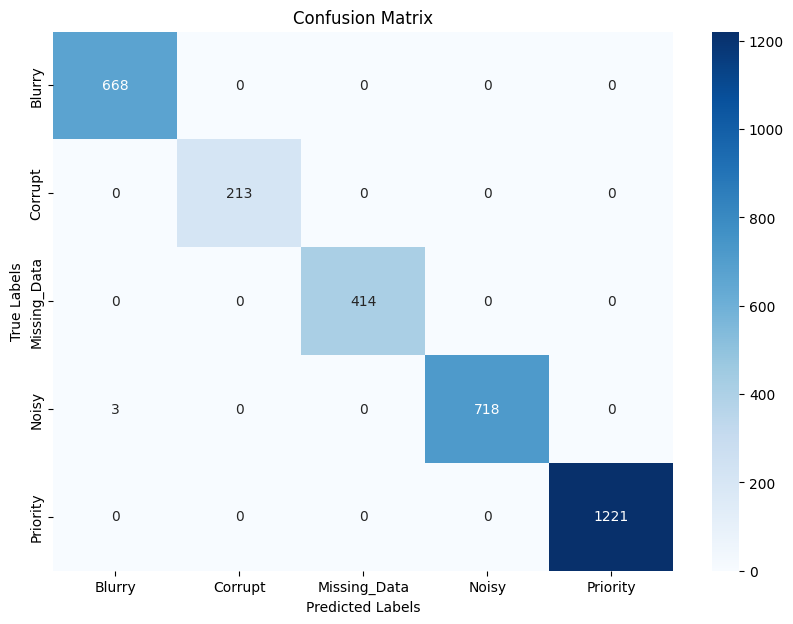

In [7]:
# Evaluate the model
metrics = evaluate_pipeline(loaded_model, test_images, test_labels, preprocessing_fn_CNN)